In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import h5py
import time
import random
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.colors as colors
from scipy import signal

In [2]:
def MA(lst,N):
    return np.divide(np.convolve(lst,np.ones(N,),"valid"),N)

def rms(sample): 
    return math.sqrt(sum([x**2 for x in sample]))/math.sqrt(len(sample))

def get_sample(i):
    f=h5py.File("samples_full.hdf5","r")
    samp=f['Samples']
    time=f['Time']
    
    return samp[i,:],time[i]

def normalize(data):
    return np.divide(np.subtract(data,np.mean(data)),np.std(data))

def logPSD(sample1,N=15):
    fftF1=np.fft.rfft(sample1)
    fftF1[0]=0

    return np.log10(MA(np.absolute(fftF1),N))

def extr(sample): 
    mn=abs(min(sample))
    mx=max(sample)
    if mn>mx:
        return mn
    else:
        return mx
    
def peak_no(sample,threshold,window=2000):
    count=0
    step=0
    for i in range(len(sample)):
        if step>0:
            step-=1
            continue
        if sample[i]>threshold:
            count+=1
            step=window
            
    return count

In [3]:
f=h5py.File("samples_full.hdf5","r")
P=f['Samples']
T=f['Time']


In [53]:
res=P[37]
ts=[T[37]]
for i in range(38,332):

    res=np.concatenate((res,P[i]),axis=None)
    ts.append(T[i])

In [52]:
print(-T[331]+T[37])

11.455003


4.4332575e-07 3401248.5


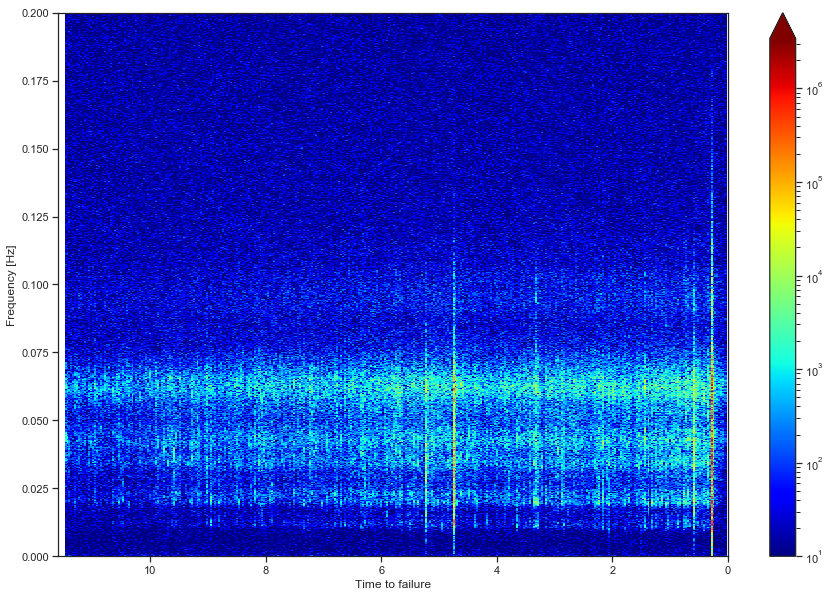

In [64]:
r, t, Sxx = signal.spectrogram(res,nperseg=150000)
t=np.multiply(t,11.455003/(t[-1]-t[0]))
t=t[::-1]
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
mesh=ax.pcolormesh(t, r, Sxx,cmap="jet",norm=colors.LogNorm(vmin=10, vmax=np.amax(Sxx)))
fig.colorbar(mesh, ax=ax, extend='max')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time to failure')
ax.set_ylim((0,0.2))
ax.set_xlim((T[37]+0.1,0))
print(np.amin(Sxx),np.amax(Sxx))

In [5]:
P0=[] #t<0.35
P1=[] #0.4<t<2
P2=[] #2<t<3
P3=[] #3<t<4
P4=[] #4<t<5
P5=[] #5<t<6
P6=[] #6<t<7
P7=[] #7<t<8
P8=[] #8<t

for i in range(4178):
    if T[i]<0.35:
        P0.append(P[i])
    elif T[i]<2:
        P1.append(P[i])
    elif T[i]<3:
        P2.append(P[i])
    elif T[i]<4:
        P3.append(P[i])
    elif T[i]<5:
        P4.append(P[i])
    elif T[i]<6:
        P5.append(P[i])
    elif T[i]<7:
        P6.append(P[i])
    elif T[i]<8:
        P7.append(P[i])
    else:
        P8.append(P[i])

In [6]:
st=145000
en=150000
FF0=np.zeros((len(P0),1000))

for i in range(len(P0)):
    mx=0
    mx_ff=0
    mn=10**6
    mn_ff=0
    S=P0[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)

#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1500]
#         if rm<mn:
#             mn=rm
#             mn_ff=ff[:1500]
    mx_ff=logPSD(S[145000:])
    FF0[i]=mx_ff[:1000]


FF0=np.mean(FF0,axis=0)

FF1=np.zeros((len(P1),1000))
for i in range(len(P1)):
    mx=0
    mx_ff=0
    S=P1[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF1[i]=mx_ff[:1000]
FF1=np.mean(FF1,axis=0)

FF2=np.zeros((len(P2),1000))
for i in range(len(P2)):
    mx=0
    mx_ff=0
    S=P2[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF2[i]=mx_ff[:1000]
FF2=np.mean(FF2,axis=0)

FF3=np.zeros((len(P3),1000))
for i in range(len(P3)):
    mx=0
    mx_ff=0
    S=P3[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF3[i]=mx_ff[:1000]
FF3=np.mean(FF3,axis=0)

FF4=np.zeros((len(P4),1000))
for i in range(len(P4)):
    mx=0
    mx_ff=0
    S=P4[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF4[i]=mx_ff[:1000]
FF4=np.mean(FF4,axis=0)
print(45)
FF5=np.zeros((len(P5),1000))
for i in range(len(P5)):
    mx=0
    mx_ff=0
    S=P5[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF5[i]=mx_ff[:1000]
FF5=np.mean(FF5,axis=0)

FF6=np.zeros((len(P6),1000))
for i in range(len(P6)):
    mx=0
    mx_ff=0
    S=P6[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF6[i]=mx_ff[:1000]
FF6=np.mean(FF6,axis=0)

FF7=np.zeros((len(P7),1000))
for i in range(len(P7)):
    mx=0
    mx_ff=0
    S=P7[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF7[i]=mx_ff[:1000]
FF7=np.mean(FF7,axis=0)

FF8=np.zeros((len(P8),1000))
for i in range(len(P8)):
    mx=0
    mx_ff=0
    S=P8[i]
#     for j in range(30):
#         ff=logPSD(S[5000*j:5000*(j+1)])
#         rm=rms(ff)
#         if rm>mx:
#             mx=rm
#             mx_ff=ff[:1000]
    mx_ff=logPSD(S[st:en])
    FF8[i]=mx_ff[:1000]
FF8=np.mean(FF8,axis=0)

45


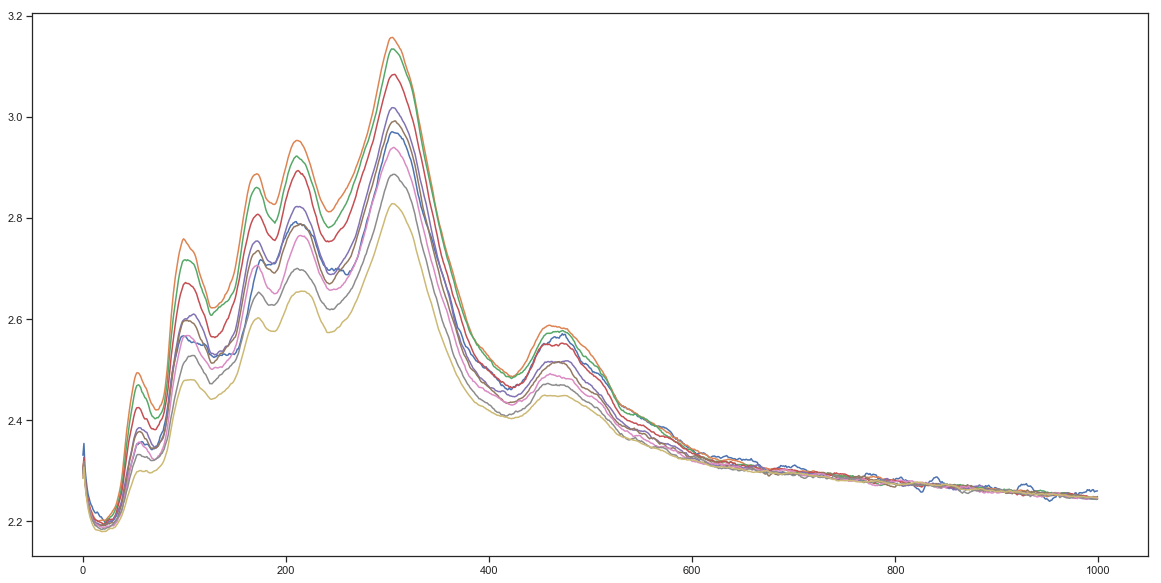

In [7]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.plot(FF0)
ax.plot(FF1)
ax.plot(FF2)
ax.plot(FF3)
ax.plot(FF4)
ax.plot(FF5)
ax.plot(FF6)
ax.plot(FF7)
ax.plot(FF8)

In [201]:
Dat0=np.power(10,FF0)
Dat0[0]=1
Dat0=np.fft.irfft(Dat0)
Dat0=np.concatenate((Dat0[999:],Dat0[:999]))
Dat0=Dat0[950:1050]

Dat3=np.power(10,FF3)
Dat3[0]=1
Dat3=np.fft.irfft(Dat3)
Dat3=np.concatenate((Dat3[999:],Dat3[:999]))
Dat3=Dat3[950:1050]

Dat5=np.power(10,FF5)
Dat5[0]=1
Dat5=np.fft.irfft(Dat5)
Dat5=np.concatenate((Dat5[999:],Dat5[:999]))
Dat5=Dat5[950:1050]

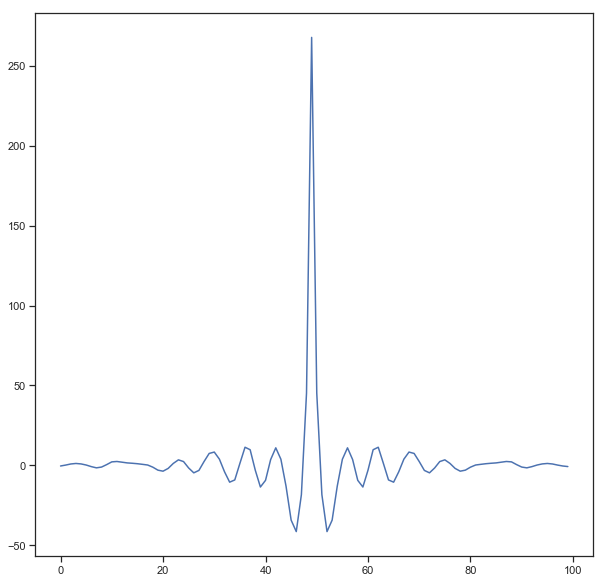

In [187]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.plot(Dat0)

10.205497 9.425499 8.646697
2 2 2


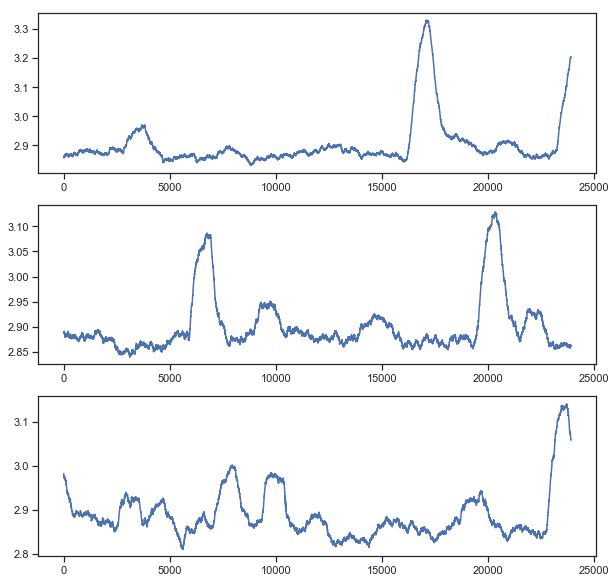

In [249]:
s,t=get_sample(70)
s2,t2=get_sample(90)
s3,t3=get_sample(110)
print(t,t2,t3)

x=MA(np.log10(np.absolute(np.convolve(s[125000:],Dat5,'valid'))),N=1000)
y=MA(np.log10(np.absolute(np.convolve(s2[125000:],Dat5,'valid'))),N=1000)
z=MA(np.log10(np.absolute(np.convolve(s3[125000:],Dat5,'valid'))),N=1000)
print(peak_no(x,3),peak_no(y,3),peak_no(z,3))
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(311)
ax.plot(x)
ax=fig.add_subplot(312)
ax.plot(y)
ax=fig.add_subplot(313)
ax.plot(z)


In [256]:
C=[]
Ts=[]
for k in range(14178):
    if k%500==0:
        print(k)
    sig,ts=get_sample(k)
    x=MA(np.log10(np.absolute(np.convolve(sig,Dat0,'valid'))),N=1000)
    C.append(peak_no(x,2.95))
    Ts.append(T[k])
    
    
    
        


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000


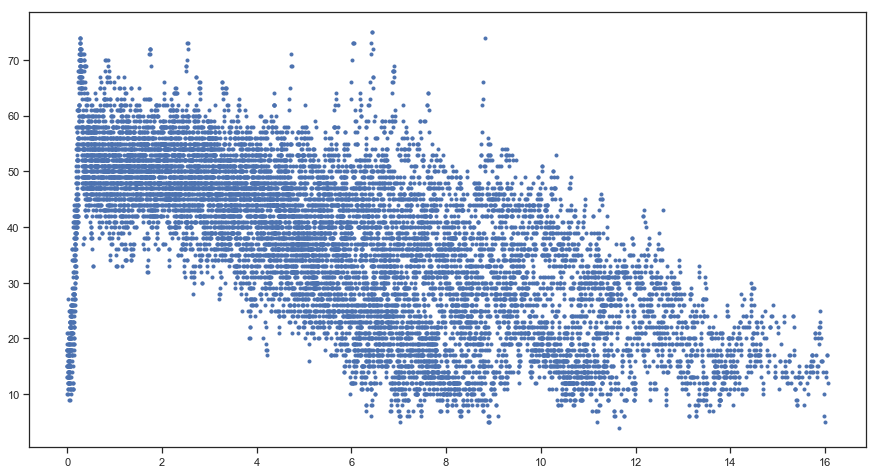

In [257]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
ax.plot(Ts,C,'.')

In [235]:
C=[]
Ts=[]
for k in range(5000):
    if k%500==0:
        print(k)
    sig,ts=get_sample(k)
    x=MA(np.log10(np.absolute(np.convolve(sig[125000:],Dat0,'valid'))),N=1000)
    C.append(rms(x))
    Ts.append(T[k])
    

0
500
1000
1500
2000
2500
3000
3500
4000
4500


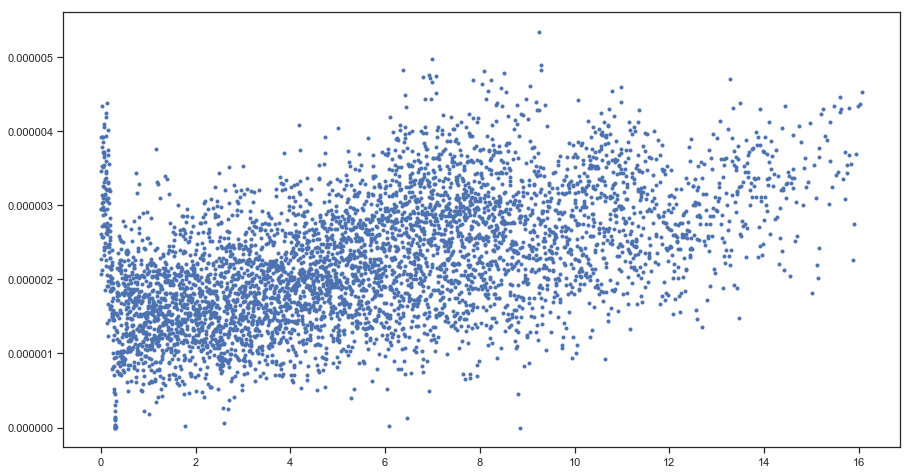

In [248]:
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
ax.plot(Ts,np.exp(-np.multiply(np.power(C,2),1.5)),'.')